In [3]:
print('hello world')

hello world


valores duplicados 0
valores faltantes:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


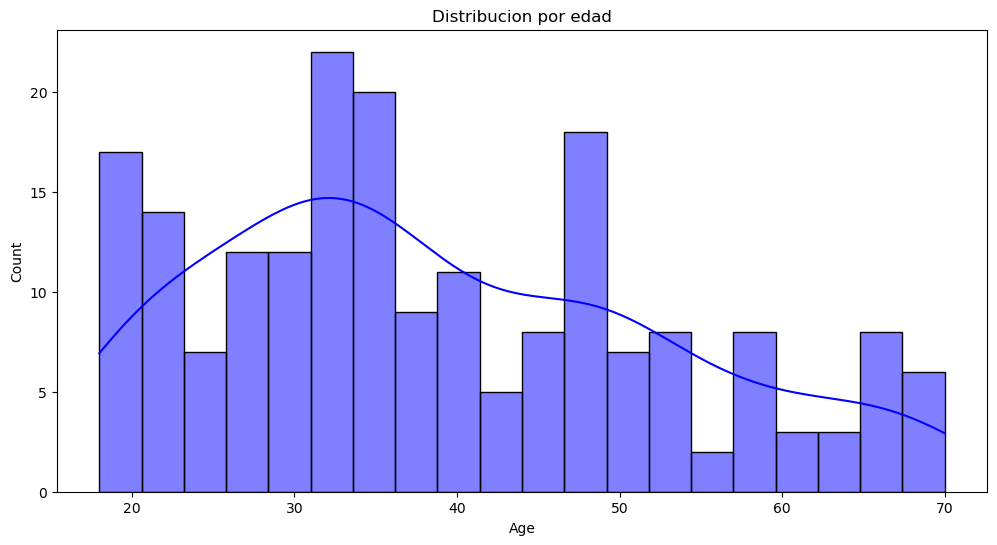

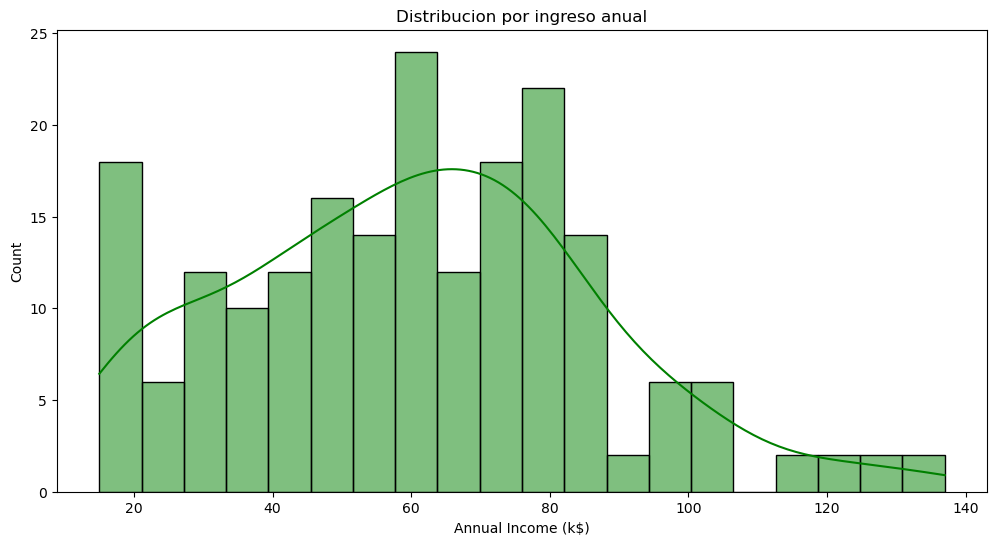

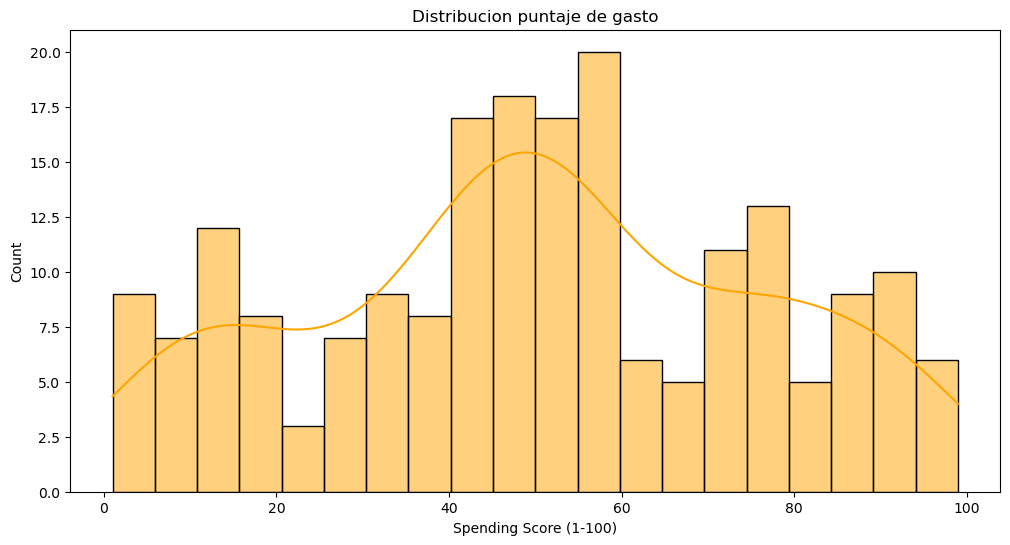

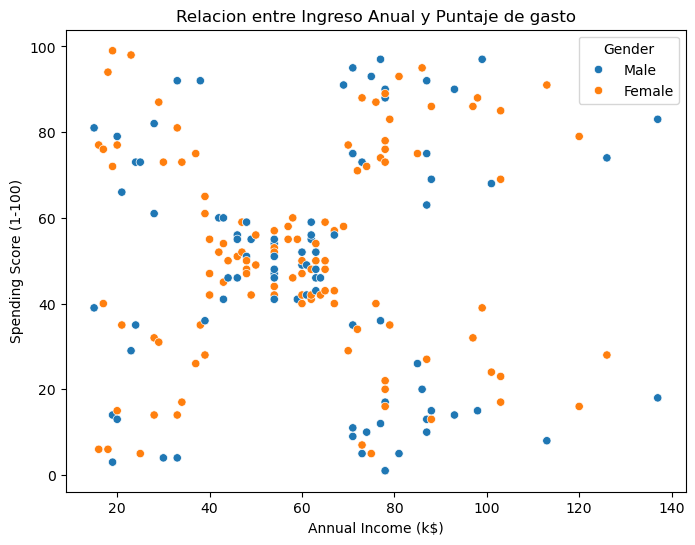

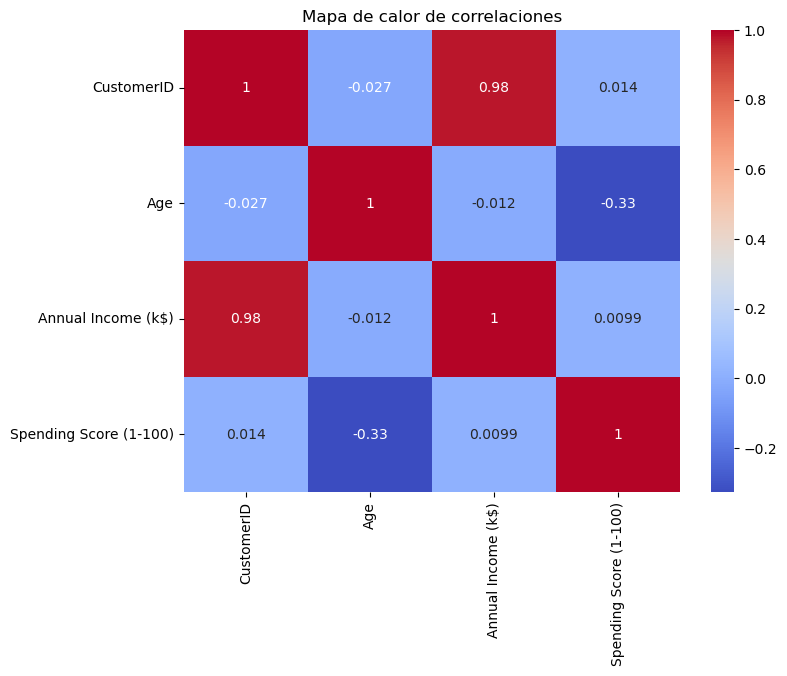

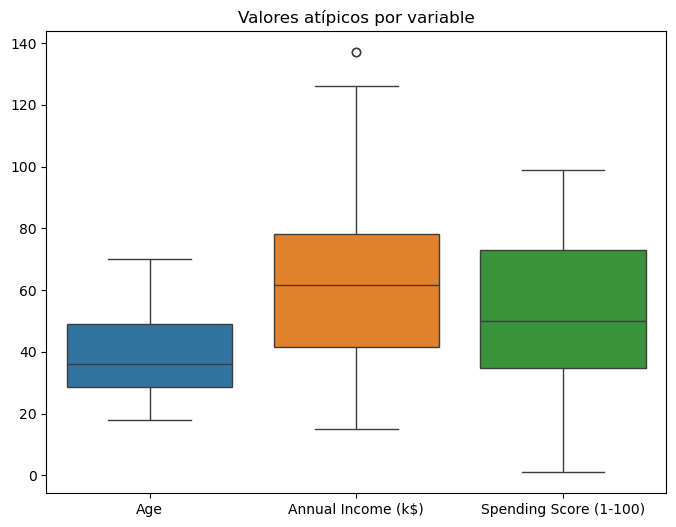

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Mall_Customers.csv")

#verificacion inicial
print("valores duplicados", df.duplicated().sum())
print("valores faltantes:\n", df.isnull().sum())

#visializando ditribuciones

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title("Distribucion por edad")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='green')
plt.title("Distribucion por ingreso anual")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='orange')
plt.title("Distribucion puntaje de gasto")
plt.show()


#relaciones entre variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Relacion entre Ingreso Anual y Puntaje de gasto")
plt.show()

# 5. Correlación entre variables numéricas
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include='number')

# Calcular la correlación
correlation_matrix = numeric_columns.corr()

# Visualizar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

# 6. Identificar valores atípicos (usando diagramas de caja)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Valores atípicos por variable")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  0 non-null      float64
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
 5   KMeans_Cluster          200 non-null    int32  
 6   Hierarchical_Cluster    200 non-null    int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 9.5 KB
None


C:\Users\HP 15 Silver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP 15 Silver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP 15 Silver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP 15 Silver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

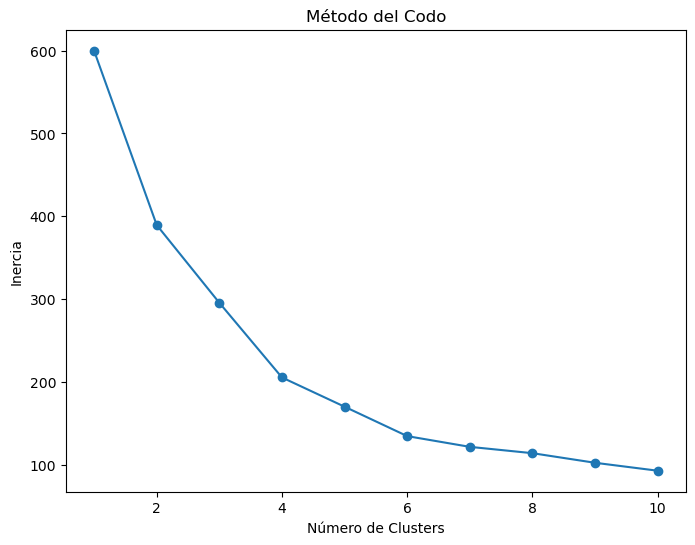

C:\Users\HP 15 Silver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


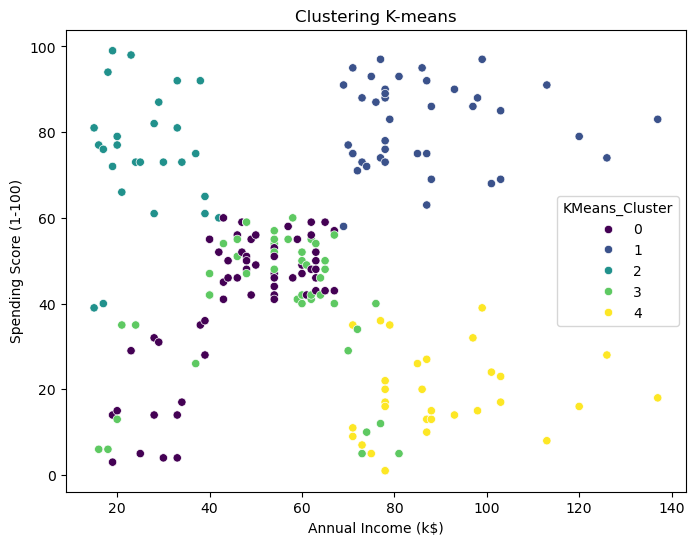

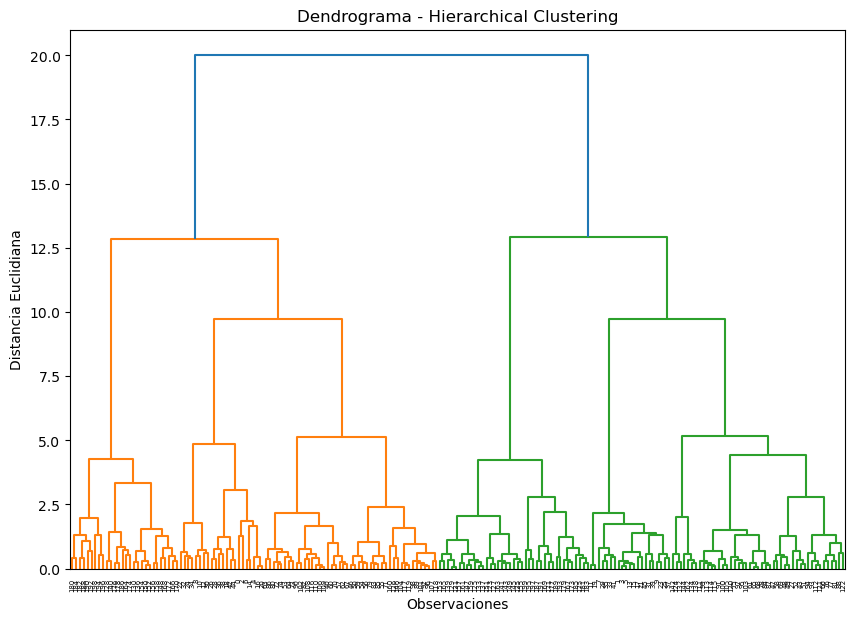

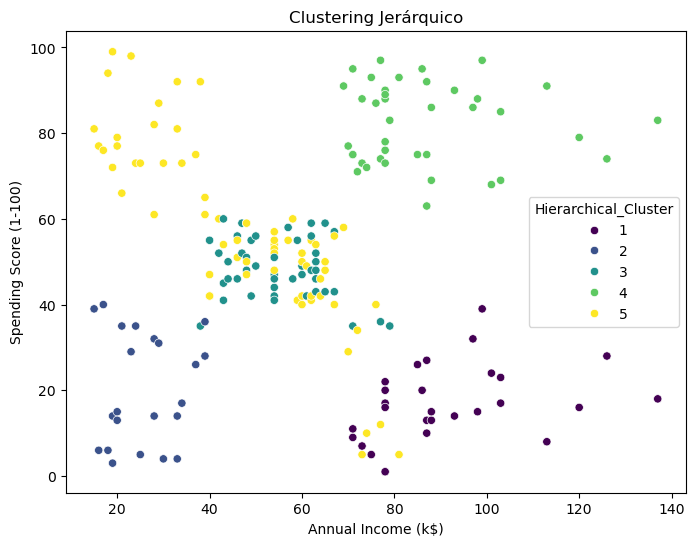

In [45]:
import os
os.environ["OPM_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



# Inspeccionar los datos
print(df.info())  # Verificar tipos de datos y valores faltantes

# Tratar valores faltantes (si los hay)
imputer = SimpleImputer(strategy='mean')  # Rellenar valores faltantes con la media
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = imputer.fit_transform(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

# Convertir variables categóricas en numéricas (si es necesario)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Escalar las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Aplicar K-means con el número óptimo de clusters
optimal_k = 5  # Basado en la gráfica del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)


import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='viridis')
plt.title('Clustering K-means')
plt.show()


from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Crear el dendrograma
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma - Hierarchical Clustering')
plt.xlabel('Observaciones')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Cortar el dendrograma para obtener clusters
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')  # Ajusta t según el número deseado de clusters


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Clustering Jerárquico')
plt.show()

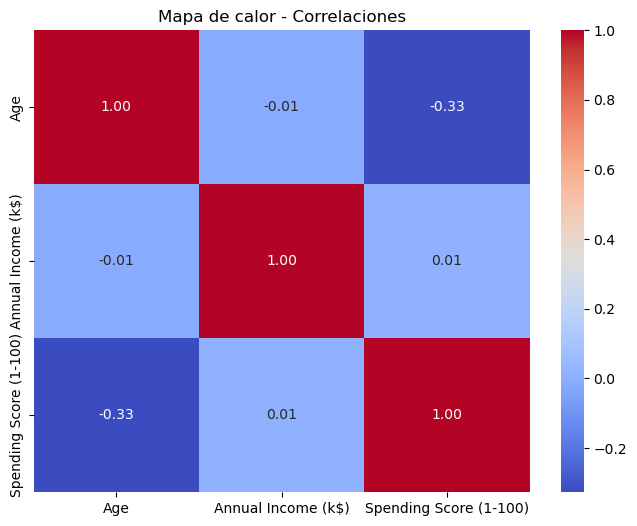

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de correlación entre variables numéricas
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Visualizar el mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor - Correlaciones")
plt.show()
# Seleccionar características relevantes
selected_features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

C:\Users\HP 15 Silver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


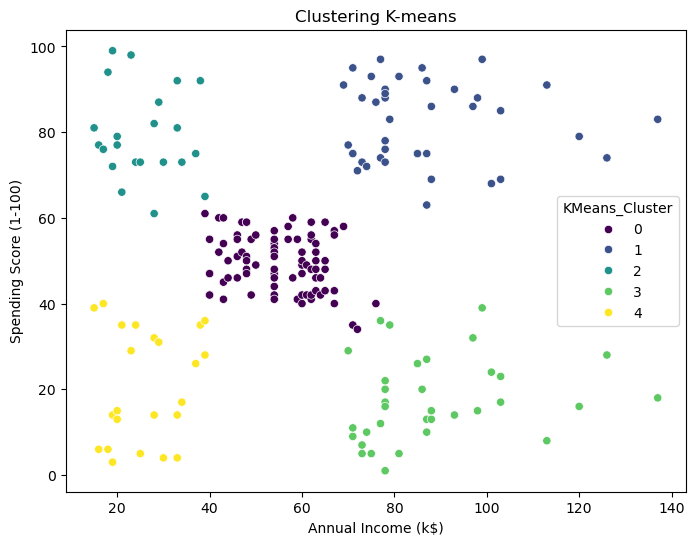

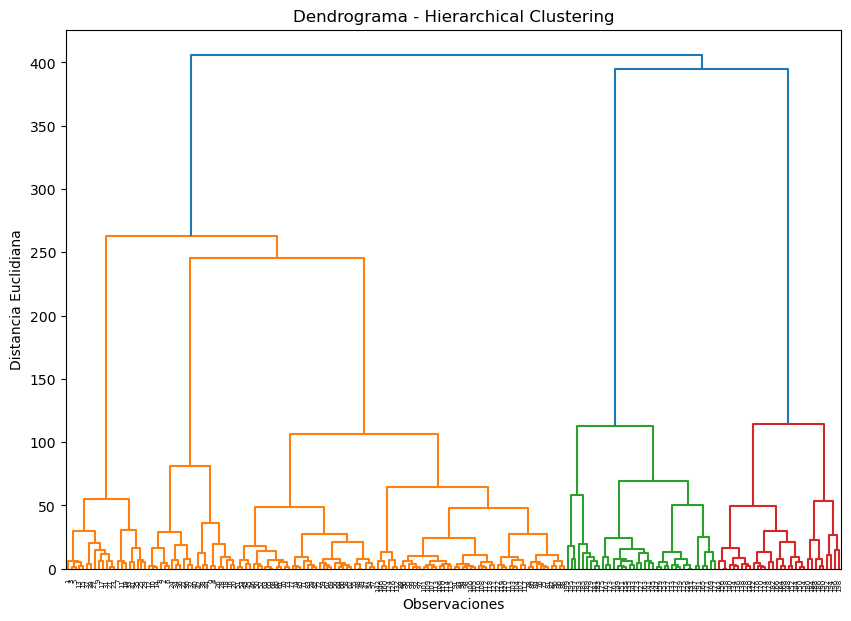

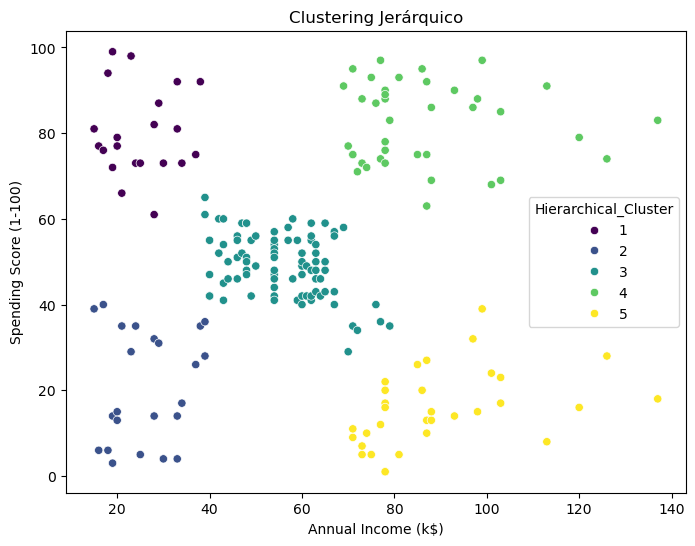

In [51]:
from sklearn.cluster import KMeans

# Determinar el número óptimo de clusters (n_clusters) previamente con el método del codo
optimal_k = 5

# Entrenar el modelo KMeans
kmeans = KMeans(
    n_clusters=optimal_k, 
    init='k-means++', 
    n_init=10, 
    max_iter=300, 
    random_state=42
)
kmeans.fit(selected_features)

# Asignar los clusters al dataset
df['KMeans_Cluster'] = kmeans.labels_

# Visualizar resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='viridis')
plt.title('Clustering K-means')
plt.show()

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Crear el dendrograma
linkage_matrix = linkage(selected_features, method='ward')  # 'ward' minimiza la varianza

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrograma - Hierarchical Clustering')
plt.xlabel('Observaciones')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Cortar el dendrograma para obtener clusters
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Visualizar resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Clustering Jerárquico')
plt.show()

Coeficiente de Silhouette (KMeans): 0.55
Índice de Calinski-Harabasz (KMeans): 247.36
Índice de Davies-Bouldin (KMeans): 0.57
Coeficiente de Silhouette (Hierarchical): 0.55
Índice de Calinski-Harabasz (Hierarchical): 243.07
Índice de Davies-Bouldin (Hierarchical): 0.58


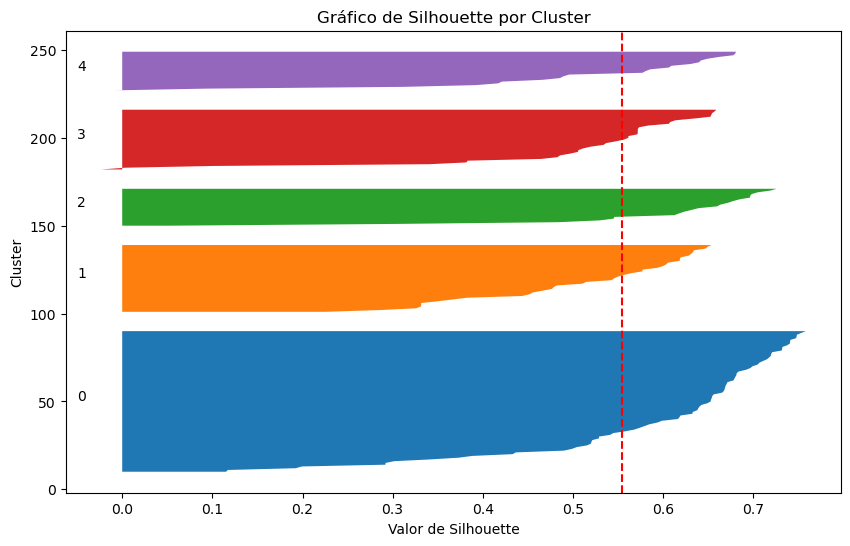

In [55]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluar el coeficiente de Silhouette
silhouette_avg = silhouette_score(selected_features, kmeans.labels_)
print(f"Coeficiente de Silhouette (KMeans): {silhouette_avg:.2f}")

# Evaluar el Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(selected_features, kmeans.labels_)
print(f"Índice de Calinski-Harabasz (KMeans): {calinski_harabasz:.2f}")

# Evaluar el Índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(selected_features, kmeans.labels_)
print(f"Índice de Davies-Bouldin (KMeans): {davies_bouldin:.2f}")

# Para hierarchical clustering usamos las etiquetas generadas previamente
silhouette_avg_hc = silhouette_score(selected_features, df['Hierarchical_Cluster'])
calinski_harabasz_hc = calinski_harabasz_score(selected_features, df['Hierarchical_Cluster'])
davies_bouldin_hc = davies_bouldin_score(selected_features, df['Hierarchical_Cluster'])

print(f"Coeficiente de Silhouette (Hierarchical): {silhouette_avg_hc:.2f}")
print(f"Índice de Calinski-Harabasz (Hierarchical): {calinski_harabasz_hc:.2f}")
print(f"Índice de Davies-Bouldin (Hierarchical): {davies_bouldin_hc:.2f}")


from sklearn.metrics import silhouette_samples

# Calcular los valores de silhouette por punto
silhouette_values = silhouette_samples(selected_features, kmeans.labels_)

# Visualizar la gráfica de Silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Gráfico de Silhouette por Cluster")
plt.xlabel("Valor de Silhouette")
plt.ylabel("Cluster")
plt.show()

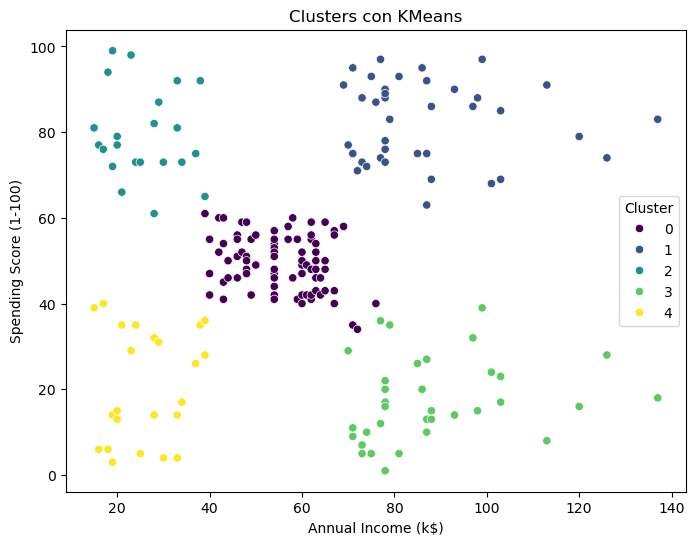

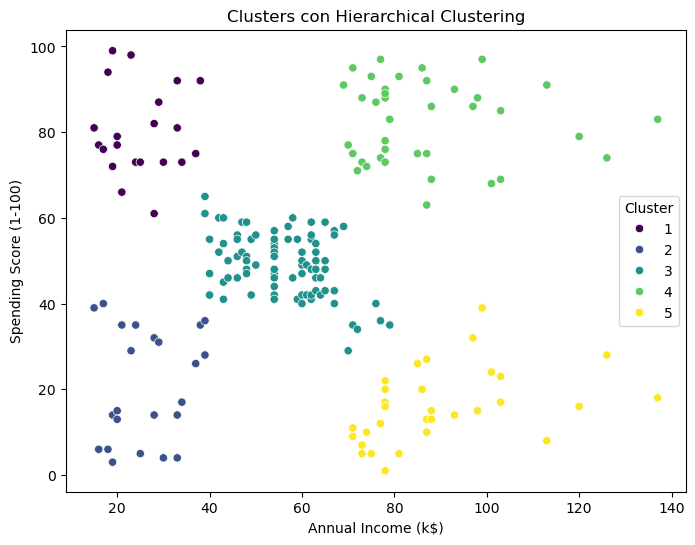

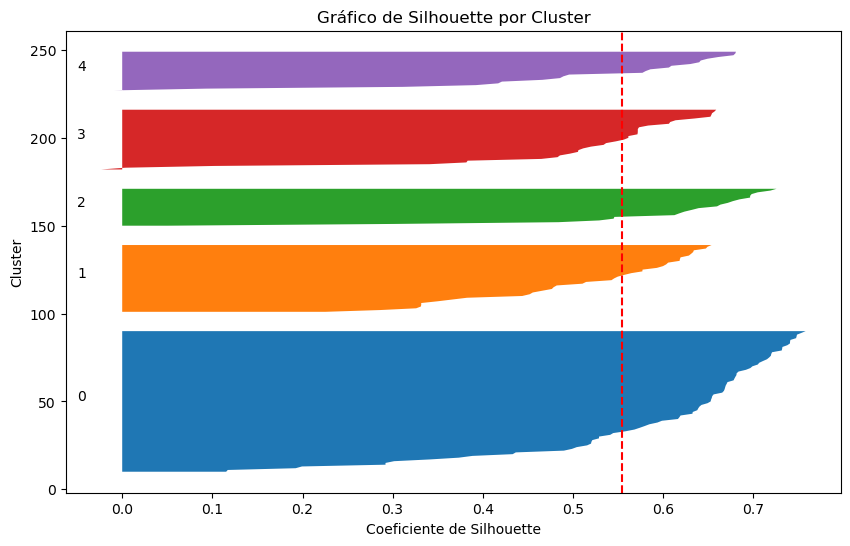

In [59]:
# Gráfico de dispersión para KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='KMeans_Cluster', 
    palette='viridis'
)
plt.title('Clusters con KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Gráfico de dispersión para Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Hierarchical_Cluster', 
    palette='viridis'
)
plt.title('Clusters con Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


from sklearn.metrics import silhouette_samples
import numpy as np

# Valores de Silhouette para cada punto
silhouette_values = silhouette_samples(selected_features, kmeans.labels_)

# Gráfico de Silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title('Gráfico de Silhouette por Cluster')
plt.xlabel('Coeficiente de Silhouette')
plt.ylabel('Cluster')
plt.show()